# Dealing with missing data

It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

In [38]:
import pandas as pd
planes = pd.read_csv("dataset/planes.csv")
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


In [39]:
# Count the number of missing values in each column
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [40]:


# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
cols_to_drop

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops'],
      dtype='object')

In [41]:
# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


# Strategies for remaining missing data

The five percent rule has worked nicely for your `planes` dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the "`Additional_Info`" and "`Price`" columns, which are missing 300 and 368 values respectively.

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())



No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


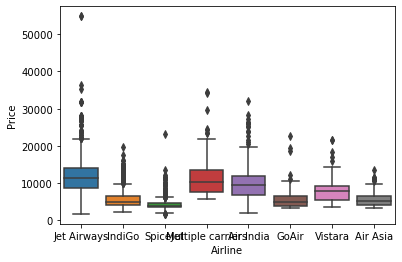

In [43]:
# Create a box plot of Price by Airline
sns.boxplot(data=planes, y="Price", x="Airline")

plt.show()

# Imputing missing plane prices

Now there's just one column with missing values left!

You've removed the "`Additional_Info`" column from planes—the last step is to impute the missing data in the "`Price`" column of the dataset.

In [44]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


In [45]:
# Convert to a dictionary
prices_dict = airline_prices.to_dict()
prices_dict

{'Air Asia': 5192.0,
 'Air India': 9443.0,
 'GoAir': 5003.5,
 'IndiGo': 5054.0,
 'Jet Airways': 11507.0,
 'Multiple carriers': 10197.0,
 'SpiceJet': 3873.0,
 'Vistara': 8028.0}

In [46]:
# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price                0
dtype: int64


In [47]:
planes = planes.drop("Additional_Info", axis=1)
print(planes.isna().sum())


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64


# Finding the number of unique values

You would like to practice some of the categorical data manipulation and analysis skills that you've just seen. To help identify which data could be reformatted to extract value, you are going to find out which non-numeric columns in the planes dataset have a large number of unique values.

In [48]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")
non_numeric

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop
...,...,...,...,...,...,...,...,...,...
10654,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop


In [49]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for column in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {column} column: ", non_numeric[column].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


# Flight duration categories

As you saw, there are 362 unique values in the "`Duration`" column. Looks like this won't be simple to convert to numbers. However, you could categorize flights by duration and examine the frequency of different flight lengths!

In [50]:
planes["Duration"].head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

In [51]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long-haul values
long_flights = "^10h|^11h|^12h|^13h|^14h|^15h|^16h"

# Adding duration categories

Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration.

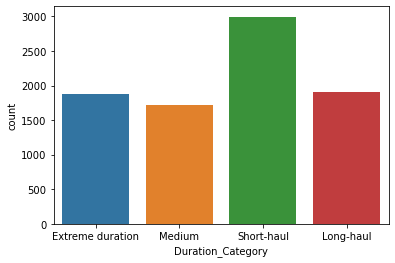

In [52]:
import numpy as np
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, flight_categories, default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

# Flight duration

You would like to analyze the duration of flights, but unfortunately, the "`Duration`" column in the `planes` DataFrame currently contains string values.

In [55]:
# Preview the column
planes['New Duration'] = planes['Duration'].str.extract(r'(\d+)h', expand=False) + 'h'
print(planes["New Duration"].head())


0    19h
1     5h
2     4h
3     2h
4    15h
Name: New Duration, dtype: object


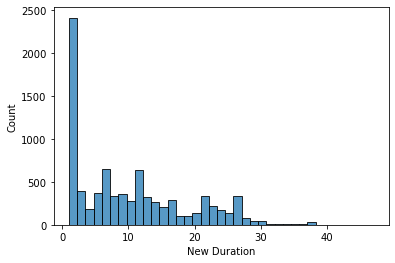

In [56]:

# Remove the string character
planes["New Duration"] = planes["New Duration"].str.replace("h", "")

# Convert to float data type
planes["New Duration"] = planes["New Duration"].astype(float)

# Plot a histogram
sns.histplot(data=planes, x="New Duration")
plt.show()

# Adding descriptive statistics

Now "`Duration`" and "`Price`" both contain numeric values in the planes DataFrame, you would like to calculate summary statistics for them that are conditional on values in other columns.

In [57]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
Air Asia           1979.826234              260
GoAir              2764.926625              147
dtype: int64


In [59]:
# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby("Airline")["New Duration"].transform(lambda x: x.median())

print(planes[["Airline","airline_median_duration"]].value_counts())



Airline            airline_median_duration
Jet Airways        13.0                       3082
IndiGo             2.0                        1632
Air India          15.0                       1399
Multiple carriers  10.0                        959
SpiceJet           2.0                         653
Vistara            3.0                         376
Air Asia           2.0                         260
GoAir              2.0                         147
dtype: int64


In [60]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())




Destination  price_destination_mean
Cochin       10473.585927              3631
Banglore     9093.622872               2291
Delhi        5248.541082                998
New Delhi    11579.306944               720
Hyderabad    5190.274021                562
Kolkata      4907.156863                306
dtype: int64


# What to do with outliers

Identifying and dealing with outliers is an integral step in performing exploratory data analysis.

In this exercise, you'll be presented with scenarios where outliers are present, and you need to decide what action you should take.

<center><img src="images/02.01.png"  style="width: 400px, height: 300px;"/></center>

# Identifying outliers

You've proven that you recognize what to do when presented with outliers, but can you identify them using visualizations?

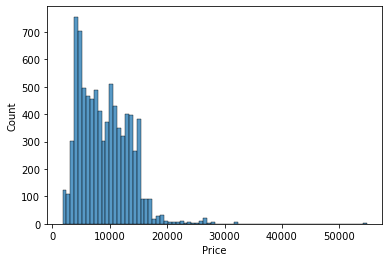

In [61]:
# Plot a histogram of flight prices
sns.histplot(data=planes, x="Price")
plt.show()

In [64]:
# Display descriptive statistics for flight duration
print(planes[["Price","New Duration"]].describe())

              Price  New Duration
count   8508.000000   8507.000000
mean    9033.468441     10.257082
std     4366.382574      8.500306
min     1759.000000      1.000000
25%     5228.000000      2.000000
50%     8452.000000      8.000000
75%    12242.000000     15.000000
max    54826.000000     47.000000


- Both has very high mean compared to minimum and maximum. So both may have outliers

# Removing outliers

While removing outliers isn't always the way to go, for your analysis, you've decided that you will only include flights where the "`Price`" is not an outlier.

In [65]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

count     8438.000000
mean      8877.466046
std       4001.838236
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64
